In [1]:
import pandas as pd

In [2]:
#importar csv utf8
df=pd.read_csv('Dades Formatives.csv',encoding='utf-8')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

df_i=df

df=df[['stic_dades_formatives_contactscontacts_ida','Formació (títol)','Nivell formatiu','Tipologia Centre formació','Estat formació','Nom del Centre formació','Fa logopèdia','Tipus comunicació al centre','Localitat Centre formació']]
#cambiar nombre stic_dades_formatives_contactscontacts_ida por ID
df.rename(columns={'stic_dades_formatives_contactscontacts_ida':'ID'},inplace=True)


/tmp/ipykernel_8031/3556762923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'stic_dades_formatives_contactscontacts_ida':'ID'},inplace=True)


In [3]:
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_8031/1252908069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


,ID,Formació (títol),Nivell formatiu,Tipologia Centre formació,Estat formació,Nom del Centre formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació
0,b0303c72-6881-f211-be68-5d6fa4cf3ee9,Psicologia,Universitat,NaN,Finalitzat,UNED,NaN,NaN,NaN
1,b0303c72-6881-f211-be68-5d6fa4cf3ee9,MÀSTER EN OCUPACIO I MERCAT DE TREBALL,Formació no reglada,NaN,Finalitzat,INTEGRACIÓ SOCIAL,NaN,NaN,NaN
2,dee884f1-f024-2e96-26f6-5fa11b15b77e,CAP,Llar infants,NaN,En curs,NaN,Sí,Oral,NaN
3,5645b781-73a3-1e2e-879c-5c04f6c79939,EDUCACIÓ INFANTIL,Educació Infantil,Concertat,En curs,VEDRUNA ESCORIAL. VIC,Sí,Oral,VIC
4,6c049838-2b2f-21d7-8356-62d6813fb7af,ESO,Educació Secundària,Públic,En curs,NaN,No,Oral,NaN


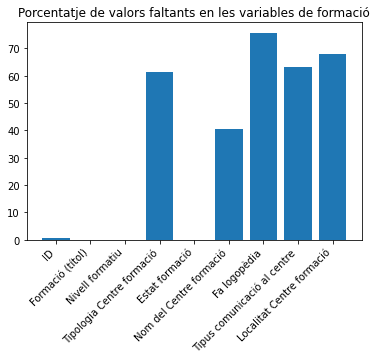

In [4]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de formació')
plt.show()

In [5]:
df.columns

Index(['ID', 'Formació (títol)', 'Nivell formatiu',
       'Tipologia Centre formació', 'Estat formació',
       'Nom del Centre formació', 'Fa logopèdia',
       'Tipus comunicació al centre', 'Localitat Centre formació'],
      dtype='object')

In [6]:
df=df[['ID','Nivell formatiu','Tipologia Centre formació', 'Estat formació', 'Fa logopèdia','Tipus comunicació al centre', 'Localitat Centre formació']]
#cambiar nombre columna stic_dades_formatives_contactscontacts_ida por ID

In [7]:
#valores unicos en Nivell formatiu
df['Nivell formatiu'].unique()

array(['Universitat', 'Formació no reglada', 'Llar infants',
       'Educació Infantil', 'Educació Secundària',
       'Educació Primària (i EGB)', 'Formació Professional',
       'Altra formació reglada', 'Batxillerat (i COU)',
       'Altres (no categoritzat)'], dtype=object)

Creem un diccionari per tal de mantenir les formacions de més nivell

In [8]:
niveles = {
    'Llar infants':0,
    'Educació Infantil':1,
    'Altres (no categoritzat)': 2,
    'Formació no reglada':3,
    'Altra formació reglada': 4,
    'Educació Primària (i EGB)': 5,
    'Educació Secundària': 6,
    'Batxillerat (i COU)': 7,
    'Formació Professional': 8,
    'Universitat': 9,
}

# Crear la nueva columna "nivell estudis" utilizando la función map
df['nivell estudis'] = df['Nivell formatiu'].map(niveles)
df.head()

,ID,Nivell formatiu,Tipologia Centre formació,Estat formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació,nivell estudis
0,b0303c72-6881-f211-be68-5d6fa4cf3ee9,Universitat,NaN,Finalitzat,NaN,NaN,NaN,9
1,b0303c72-6881-f211-be68-5d6fa4cf3ee9,Formació no reglada,NaN,Finalitzat,NaN,NaN,NaN,3
2,dee884f1-f024-2e96-26f6-5fa11b15b77e,Llar infants,NaN,En curs,Sí,Oral,NaN,0
3,5645b781-73a3-1e2e-879c-5c04f6c79939,Educació Infantil,Concertat,En curs,Sí,Oral,VIC,1
4,6c049838-2b2f-21d7-8356-62d6813fb7af,Educació Secundària,Públic,En curs,No,Oral,NaN,6


In [9]:
#unir filas duplicadas y mantener valor mas alto en nivell d'estudis
indices_max =df.groupby('ID')['nivell estudis'].idxmax()
df=df.loc[indices_max]
df.head()

,ID,Nivell formatiu,Tipologia Centre formació,Estat formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació,nivell estudis
100,10031d51-3654-6bdd-ad97-5f69f0cdf888,Educació Primària (i EGB),NaN,Finalitzat,NaN,Oral,SANT CUGAT DEL VALLÈS,5
32,118cbd91-8e15-1a15-b3e3-5f6b37902fff,Formació Professional,NaN,Finalitzat,NaN,Llengua de signes,NaN,8
194,129f1ccc-bcb6-1e15-b3d3-621c846a594f,Formació Professional,NaN,Finalitzat,NaN,NaN,NaN,8
129,12cb5f09-14e2-185e-ee1d-5f69c44f499a,Educació Primària (i EGB),Concertat,En curs,Sí,Oral,SANTA COLOMA DE FARNES,5
78,130f8822-368d-f3d8-f843-5da710debfb2,Universitat,NaN,Finalitzat,NaN,Oral,NaN,9


In [10]:
#eliminar columna nivell estudis
df = df.drop(['nivell estudis'], axis=1)
df.head()

,ID,Nivell formatiu,Tipologia Centre formació,Estat formació,Fa logopèdia,Tipus comunicació al centre,Localitat Centre formació
100,10031d51-3654-6bdd-ad97-5f69f0cdf888,Educació Primària (i EGB),NaN,Finalitzat,NaN,Oral,SANT CUGAT DEL VALLÈS
32,118cbd91-8e15-1a15-b3e3-5f6b37902fff,Formació Professional,NaN,Finalitzat,NaN,Llengua de signes,NaN
194,129f1ccc-bcb6-1e15-b3d3-621c846a594f,Formació Professional,NaN,Finalitzat,NaN,NaN,NaN
129,12cb5f09-14e2-185e-ee1d-5f69c44f499a,Educació Primària (i EGB),Concertat,En curs,Sí,Oral,SANTA COLOMA DE FARNES
78,130f8822-368d-f3d8-f843-5da710debfb2,Universitat,NaN,Finalitzat,NaN,Oral,NaN


In [11]:
#nulls
df.isnull().sum()

ID                               0
Nivell formatiu                  0
Tipologia Centre formació      121
Estat formació                   0
Fa logopèdia                   144
Tipus comunicació al centre    118
Localitat Centre formació      130
dtype: int64

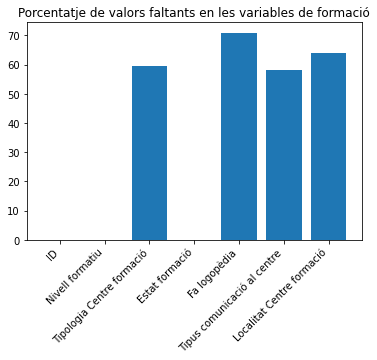

In [12]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de formació')
plt.show()

No és determinant el nombre de nulls, ja que inclou usuaris sense formació (infants)

In [13]:
#pasar df_dadesformatives a csv
df.to_csv('dades_formatives_f.csv', index=False, encoding='utf-8')